In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
dictionary=cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_50)
board=cv2.aruco.CharucoBoard_create(5, 7, 3.8, 1.9, dictionary)

In [3]:
def detect (img, dictionary, board):
    corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(img, dictionary)
    _, charucoCorners, charucoIds = cv2.aruco.interpolateCornersCharuco(corners, ids, img, board)
    corners = charucoCorners.reshape(charucoCorners.shape[0],charucoCorners.shape[2])#.astype(np.uint8)
    ids = charucoIds.reshape(charucoIds.shape[0])#.astype(np.uint8)
    return charucoCorners, ids

In [ ]:
def pairs(ref_ids, ref_corners, points):
    pts_src = []
    pts_dst = []
    for i in range(len(ref_ids)):
        if(ref_ids[i] in points):
            pts_dst.append(points[i])
            pts_src.append(ref_corners[i])
    return pts_src, pts_dst

In [4]:
img = cv2.imread('./snap/snap_00001.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
corners, ids = detect(gray, dictionary, board)

In [6]:
points = {}
for i in range(len(ids)):
    points[ids[i]] = corners[i] 

In [7]:
# só uma vez
charuco = cv2.imread('charuco.png')

In [8]:
# só uma vez
ref_corners, ref_ids = detect(charuco, dictionary, board)

In [9]:
pts_src, pts_dst = pairs(ref_ids, ref_corners, points)

In [ ]:
insper = cv2.imread('insper.png')[:,:,::-1]

In [ ]:
h, status = cv2.findHomography(np.asarray(pts_src), np.asarray(pts_dst))
mask = cv2.warpPerspective(np.ones_like(charuco)*255, h, (gray.shape[1],gray.shape[0]))
not_mask = cv2.bitwise_not(mask)
resized = cv2.resize(insper, charuco.shape[:2], interpolation = cv2.INTER_AREA) 
warped = cv2.warpPerspective(resized, h, (img.shape[1],img.shape[0]))
final = cv2.bitwise_and(cv2.bitwise_or(img[:,:,::-1], mask), cv2.bitwise_or(warped, not_mask))#mask.astype(np.uint8))

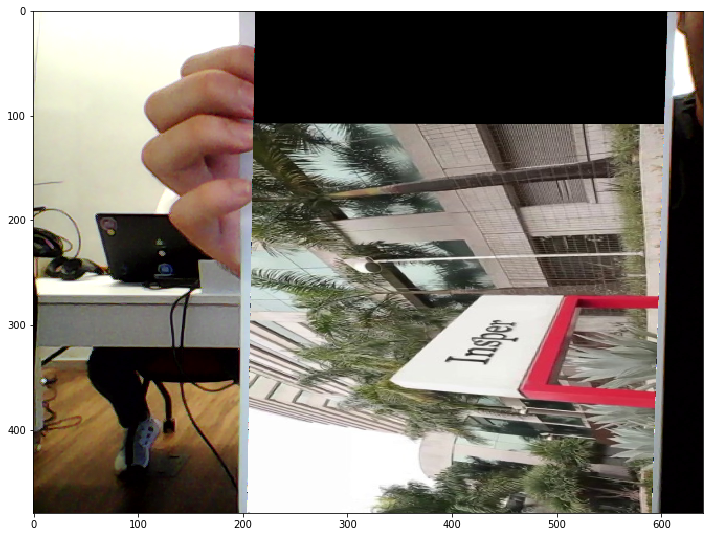

In [20]:
plt.figure(figsize=(12,12))
plt.imshow(final)
plt.show()

In [23]:
import os.path
cap = cv2.VideoCapture(0)

_, frame = cap.read()

while frame is not None:
    cv2.imshow('frame', frame[:, ::-1, :])
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    corners, ids = detect(gray, dictionary, board)
    pts_src, pts_dst = pairs(ref_ids, ref_corners, points)
    
    
    h, status = cv2.findHomography(np.asarray(pts_src), np.asarray(pts_dst))
    mask = cv2.warpPerspective(np.ones_like(charuco)*255, h, (gray.shape[1],gray.shape[0]))
    not_mask = cv2.bitwise_not(mask)
    resized = cv2.resize(insper, charuco.shape[:2], interpolation = cv2.INTER_AREA) 
    warped = cv2.warpPerspective(resized, h, (img.shape[1],img.shape[0]))
    final = cv2.bitwise_and(cv2.bitwise_or(img[:,:,::-1], mask), cv2.bitwise_or(warped, not_mask))#mask.astype(np.uint8))
    plt.figure(figsize=(12,12))
    plt.imshow(final)
    plt.show()
    
    points = {}
    for i in range(len(ids)):
        points[ids[i]] = corners[i] 

    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
#     elif k == ord('s'):
#         filename = f'snap/snap_{snap:05d}.png' 
#         cv2.imwrite(filename, frame)
#         print(f'Saved {filename}')
#         snap += 1

    _, frame = cap.read()

cap.release()
cv2.destroyAllWindows()